In [1]:
import os
# disable tf deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import tifffile
from matplotlib import pyplot as plt
import skimage
import numpy as np
from nuset import Nuset

Text(0.5, 1.0, 'Sigmoid & Histogram correction')

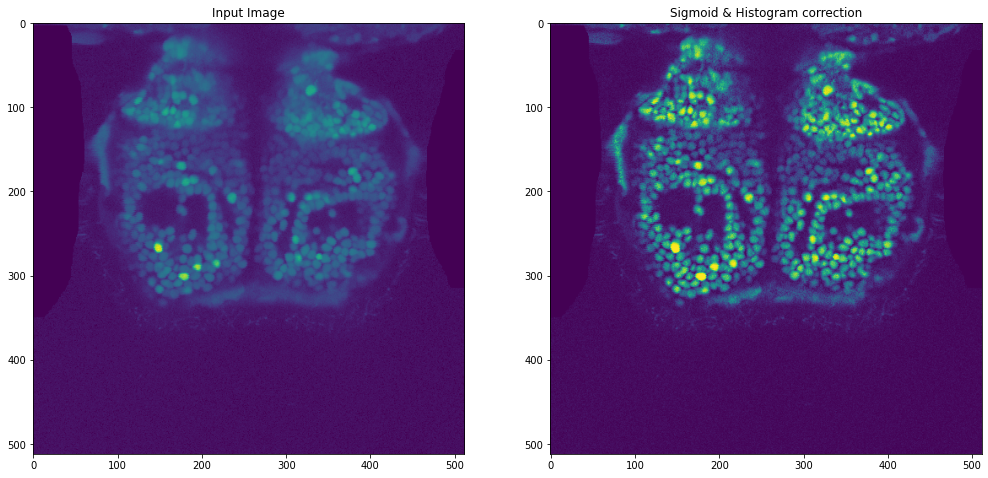

In [2]:
# Image provided by 
# https://www.cell.com/neuron/fulltext/S0896-6273(18)30297-6#bib8
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17,20))
plane = tifffile.imread('/home/kushal/Sars_stuff/zfish_stds/5.tiff')
axs[0].imshow(plane)
axs[0].set_title('Input Image')

plane = skimage.exposure.adjust_sigmoid(plane, cutoff=42, gain=0.1) * 65534
plane = plane.astype(np.uint16)
plane = skimage.exposure.equalize_adapthist(plane, kernel_size=8)
axs[1].imshow(plane)
axs[1].set_title('Sigmoid & Histogram correction')

/home/kushal/python-virtual-environments/nuset-local/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
100%|██████████| 1/1 [00:22<00:00, 22.53s/it]


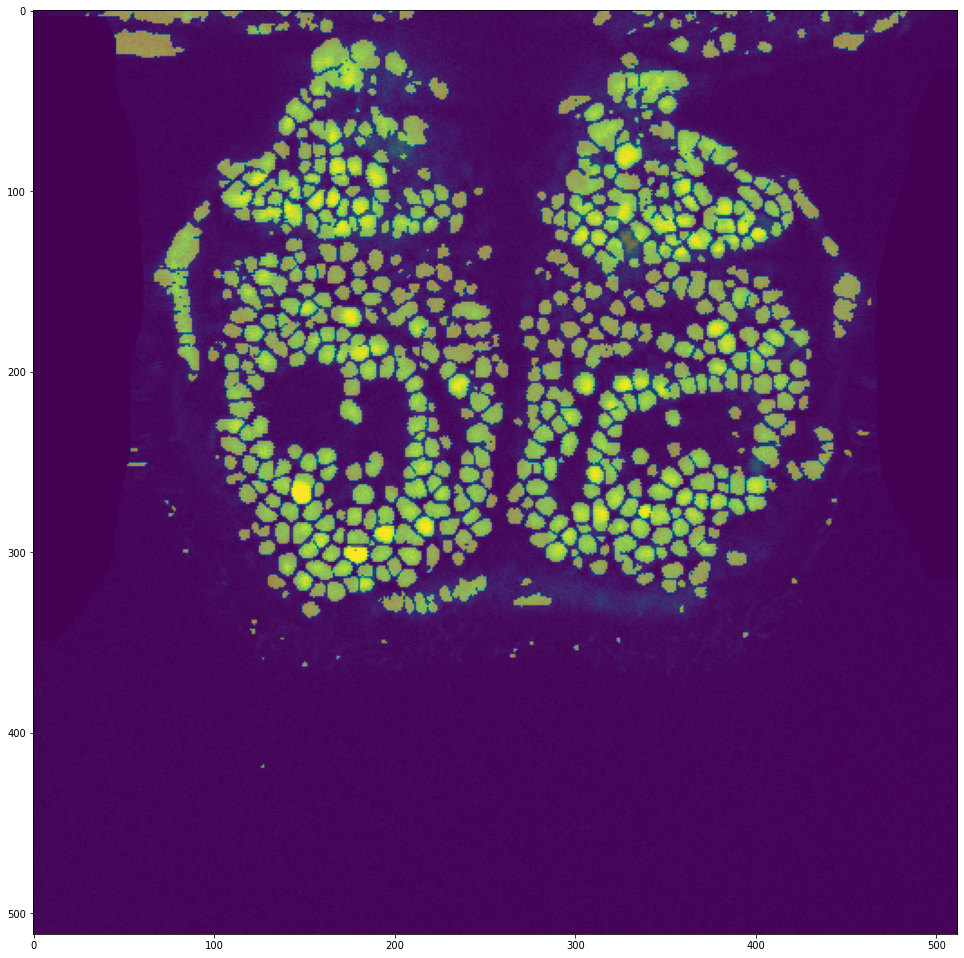

In [3]:
nuset = Nuset()

mask = nuset.predict(
    image=plane,
    watershed=True,
    min_score=0.1,
    nms_threshold=0.7,
    rescale_ratio=2.5
)

mask[mask < 0.5] = 0
mask[mask > 0.5] = 1

fig = plt.figure(figsize=(17, 17))

plt.imshow(plane, cmap='viridis')
plt.imshow(mask, alpha=0.5)
plt.show()